In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Verileri yükle
X_data = np.load("X_data.npy")
Y_data = np.load("Y_data.npy")

print("X_data shape:", X_data.shape)
print("Y_data shape:", Y_data.shape)


X_data shape: (2230, 128, 128, 3)
Y_data shape: (2230,)


### I transferred the data processed with PySpark to the Python environment and converted it into NumPy arrays.
### Now, I'm ready to use this data for model training.

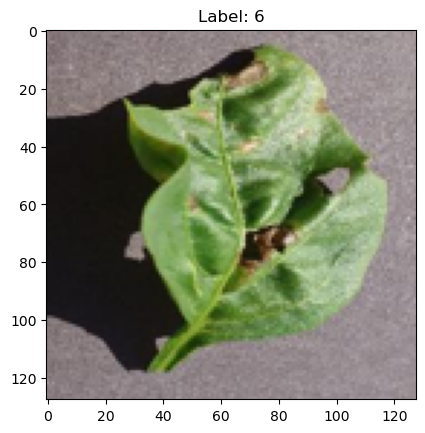

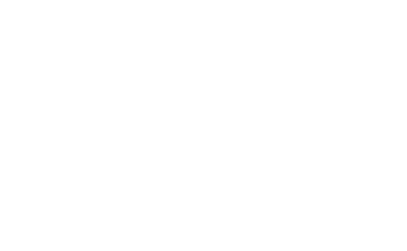

In [6]:
index = 1150
plt.imshow(X_data[index])  
plt.title(f"Label: {Y_data[index]}")
plt.figure(figsize=(5, 3))
plt.axis("off")
plt.show()

In [7]:
# 1. Create a list of label names (class names by manueal we had labels name on pyspark

In [10]:
np.unique(Y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [12]:
# 1. Create a list of label names (class names)
class_names = [
    "Apple___Apple_scab",                        # 0
    "Apple___Black_rot",                         # 1
    "Apple__cedar_apple_rust",                   # 2 
    "Apple___healthy",                           # 3
    "Cherry___Powdery_mildew",                   # 4
    "Cherry___healthy",                          # 5
    "Pepper,_bell___Bacterial_spot",             # 6
    "Pepper,_bell___healthy",                    # 7
    "Potato___Early_blight",                     # 8
    "Potato___Late_blight",                      # 9
    "Potato___healthy",                          # 10
    "Strawberry___Leaf_scorch",                  # 11
    "Strawberry___healthy",                      # 12
    "Tomato_bacterial_spot",                    # 13 
    "Tomato___Early_blight",                     # 14
    "Tomato___Late_blight",                      # 15
    "Tomato_leaf_mold" ,                         # 16
    "Tomato___Septoria_leaf_spot",               # 17
    "Tomato___Spider_mites Two-spotted_spider_mite", # 18
    "Tomato___Target_Spot",                      # 19
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",    # 20
    "Tomato___Tomato_mosaic_virus",              # 21
    "Tomato___healthy"                           # 22
]

#### I already knew the index number corresponding to each class from the PySpark processing, 
#### so I used that information to map the labels to their respective class names again.

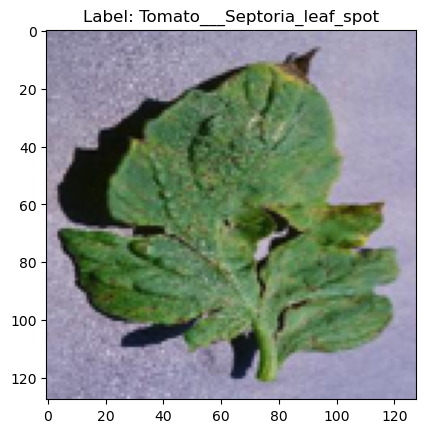

In [15]:
index = 768
plt.imshow((X_data[index] * 255).astype(np.uint8))
plt.title(f"Label: {class_names[Y_data[index]]}") 
plt.show()


#### This code helps visualize the data and verify if the image corresponds to the correct class label.

# <span style="color:red">Split Data Train-Test-Validation</span>


In [19]:
#  (%80 Train, %20 Test)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# get %20validation from Train
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Control
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (1427, 128, 128, 3), Validation set: (357, 128, 128, 3), Test set: (446, 128, 128, 3)


### The data was split into 80% training and 20% testing. 
### Then, 20% of the training data was set aside as a validation set, 
### resulting in a final distribution of 64% training, 16% validation, and 20% testing.

# <span style="color:red">CNN MODEL STRUCTURE</span>


In [24]:
from tensorflow.keras.utils import to_categorical

num_classes = 23
# One-Hot Encoding
Y_train = to_categorical(Y_train, num_classes)
Y_val = to_categorical(Y_val, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Modeli oluştur ve derle
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(23, activation='softmax')  # 23 sınıf çıktısı
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli Eğit
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_val, Y_val))

# Test Setinde Değerlendirme
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

C:\Users\erank\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.1564 - loss: 2.9890 - val_accuracy: 0.2605 - val_loss: 2.5957
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.2852 - loss: 2.5091 - val_accuracy: 0.3641 - val_loss: 2.2248
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.3506 - loss: 2.2224 - val_accuracy: 0.3810 - val_loss: 2.0991
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.4164 - loss: 1.9722 - val_accuracy: 0.4986 - val_loss: 1.7790
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.5043 - loss: 1.6147 - val_accuracy: 0.5126 - val_loss: 1.6782
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.5336 - loss: 1.4707 - val_accuracy: 0.5798 - val_loss: 1.5696
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.6190 - loss: 1.1914 - val_accuracy: 0.5182 - val_loss: 1.6100
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.6593 - loss: 1.0711 - val_accu

#### We use 3x3 filters to learn edges and details, starting with 32 filters, then increasing to 64 and finally 128.
#### By applying a pool size of (2,2), we reduce the image resolution.
#### Our output layer has 23 neurons with a softmax activation because we have 23 classes.
#### We set the number of epochs to 25, meaning the model will repeat the training process 25 times.
#### The batch size is set to 32, so 32 images will be processed by the model at the same time.

In [27]:
from sklearn.metrics import classification_report
import numpy as np

# Model tahminlerini al
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Sınıf bazlı raporu oluştur
report = classification_report(y_true, y_pred, target_names=class_names, digits=2)
print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.67      0.31      0.42        13
                            Apple___Black_rot       0.91      0.77      0.83        13
                      Apple__cedar_apple_rust       0.83      0.68      0.75        22
                              Apple___healthy       0.38      0.50      0.43        12
                      Cherry___Powdery_mildew       0.67      0.83      0.74        12
                             Cherry___healthy       0.62      0.53      0.57        19
                Pepper,_bell___Bacterial_spot       0.38      0.56      0.45        18
                       Pepper,_bell___healthy       0.50      0.53      0.52        15
                        Potato___Early_blight       0.88      0.54      0.67        13
                         Potato___Late_blight       0.00      0.00      0.00         7
 

# <span style="color:red">LOSS AND ACCURACY GRAPH</span>

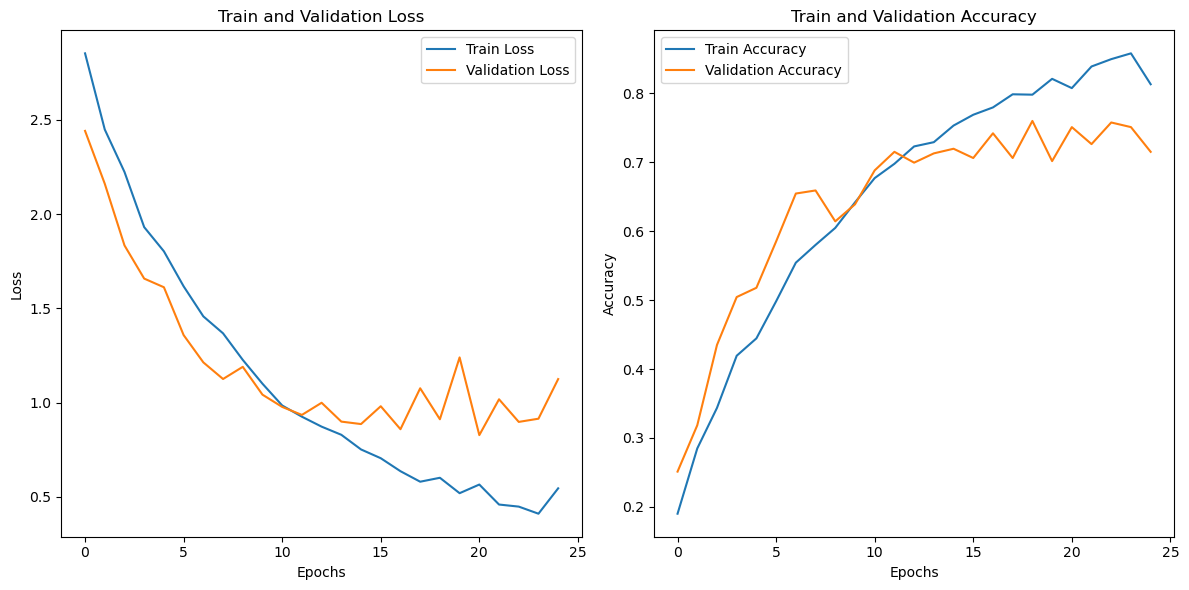

In [41]:
import matplotlib.pyplot as plt

# Loss grafiği
plt.figure(figsize=(12, 6))

# Trainig and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

### Training and validation loss/accuracy curves. While training accuracy increases steadily, 
### validation accuracy plateaus and validation loss rises after epoch 15, indicating overfitting.

# <span style="color:red">CONFUSION MANTRIX</span>

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


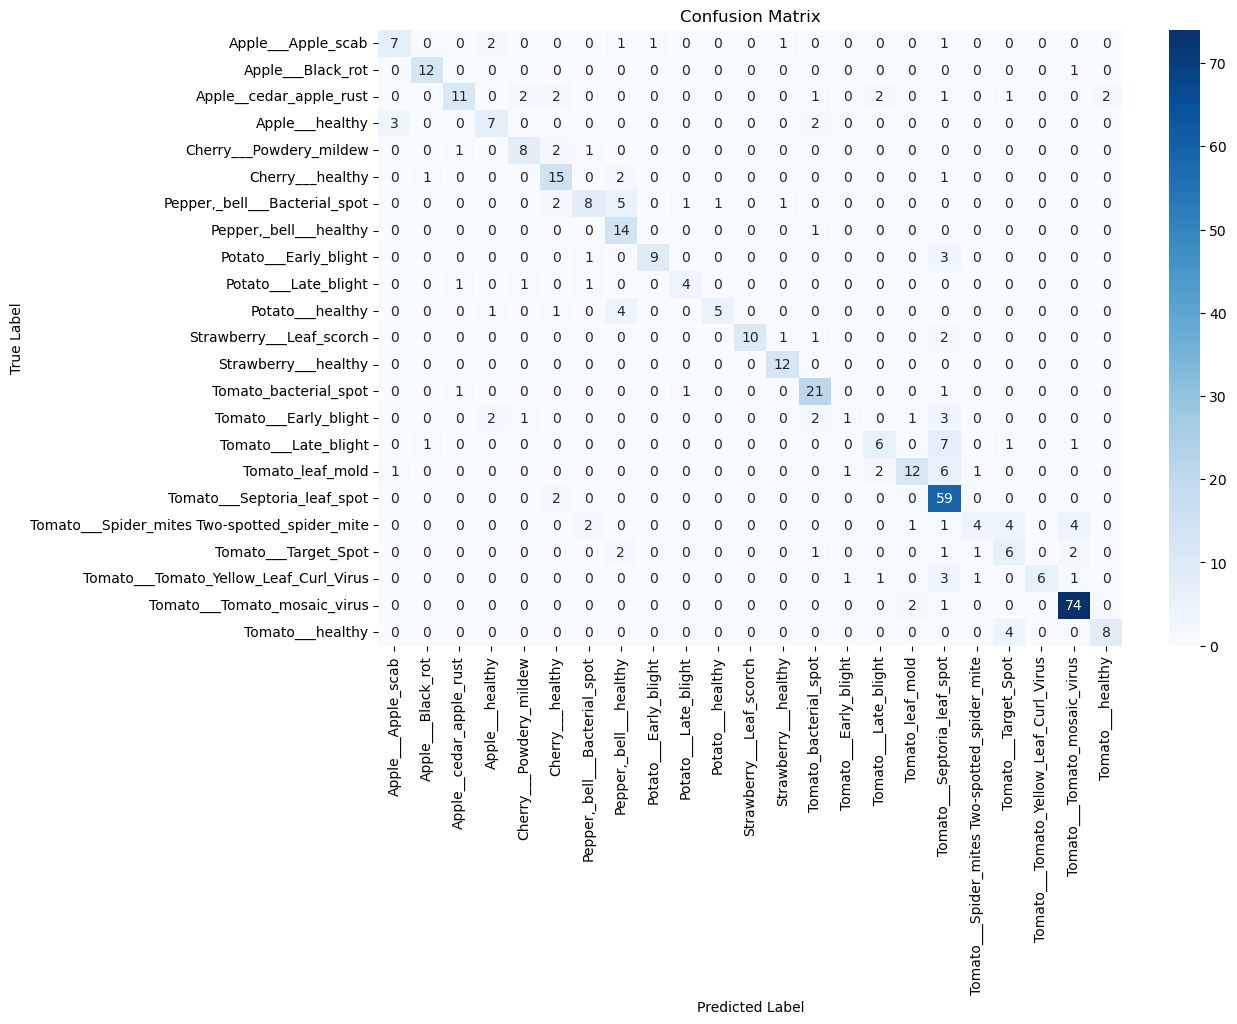

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model predictions on the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert one-hot encoding to class index
Y_true = Y_test  # Zaten sınıf indeksleri içeriyor
  # Convert one-hot true labels to class index

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [93]:
unique_classes, counts = np.unique(Y_data, return_counts=True)
for class_idx, count in zip(unique_classes, counts):
    print(f"{class_names[class_idx]}: {count} pictures")

Apple___Apple_scab: 72 pictures
Apple___Black_rot: 72 pictures
Apple__cedar_apple_rust: 72 pictures
Apple___healthy: 72 pictures
Cherry___Powdery_mildew: 60 pictures
Cherry___healthy: 72 pictures
Pepper,_bell___Bacterial_spot: 84 pictures
Pepper,_bell___healthy: 71 pictures
Potato___Early_blight: 60 pictures
Potato___Late_blight: 60 pictures
Potato___healthy: 60 pictures
Strawberry___Leaf_scorch: 84 pictures
Strawberry___healthy: 60 pictures
Tomato_bacterial_spot: 96 pictures
Tomato___Early_blight: 60 pictures
Tomato___Late_blight: 84 pictures
Tomato_leaf_mold: 108 pictures
Tomato___Septoria_leaf_spot: 324 pictures
Tomato___Spider_mites Two-spotted_spider_mite: 95 pictures
Tomato___Target_Spot: 59 pictures
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 60 pictures
Tomato___Tomato_mosaic_virus: 373 pictures
Tomato___healthy: 72 pictures


### When we look at the number of images in each class, we can see that "Tomato___Tomato_mosaic_virus" and "Tomato___Septoria_leaf_spot" have higher predictions. 
### From this, we can conclude that classes with fewer data points generally show lower accuracy. 
### To solve this issue, I will perform <span style="color:red">DATA AUGMENTATİON</span>
### for the classes with fewer images in the next notebook.